In [1]:
# Add the packages to be used (Run it only the first time and after that you can skip this step)
using Pkg
Pkg.add("NCDatasets")
Pkg.add("Missings")
Pkg.add("Dates")
Pkg.add("PhysOcean")
Pkg.add("Statistics")
Pkg.add("DataFrames")
Pkg.add("CSV")
Pkg.add("PythonPlot")
Pkg.add("ColorSchemes")
Pkg.add("NaNStatistics")
Pkg.add("Plots")

   Resolving package versions...
  No Changes to `~/.julia/environments/v1.11/Project.toml`
  No Changes to `~/.julia/environments/v1.11/Manifest.toml`
   Resolving package versions...
  No Changes to `~/.julia/environments/v1.11/Project.toml`
  No Changes to `~/.julia/environments/v1.11/Manifest.toml`
   Resolving package versions...
  No Changes to `~/.julia/environments/v1.11/Project.toml`
  No Changes to `~/.julia/environments/v1.11/Manifest.toml`
   Resolving package versions...
  No Changes to `~/.julia/environments/v1.11/Project.toml`
  No Changes to `~/.julia/environments/v1.11/Manifest.toml`
   Resolving package versions...
  No Changes to `~/.julia/environments/v1.11/Project.toml`
  No Changes to `~/.julia/environments/v1.11/Manifest.toml`
   Resolving package versions...
  No Changes to `~/.julia/environments/v1.11/Project.toml`
  No Changes to `~/.julia/environments/v1.11/Manifest.toml`
   Resolving package versions...
  No Changes to `~/.julia/environments/v1.11/Project.to

In [1]:
# Activate the MHW package
using Pkg
Pkg.activate("/Users/sda/Desktop/MHW_AdORS/MarineHeatwaves") 
Pkg.instantiate()

  Activating project at `~/Desktop/MHW_AdORS/MarineHeatwaves`


In [3]:
# Load the Pkgs
using Statistics, CSV, DataFrames, NaNStatistics
using PythonPlot, ColorSchemes
using NCDatasets, Missings, Dates
using MarineHeatwaves, Plots

In [5]:
# Read the SST data
## Ex: South Pacific coast (1990-2020)

ds = Dataset("/Users/sda/Desktop/MHW_AdORS/METOFFICE-GLO-SST-L4-REP-OBS-SST_1734694344804.nc")
keys(ds)
tmp = nomissing(ds["analysed_sst"][:,:,:],NaN);
sst_full  = tmp .- 273.15;
time = nomissing(ds["time"][:]); 
lat = nomissing(ds["latitude"][:]);
lon = nomissing(ds["longitude"][:]);


# Size of SST data and its dims (to check everything is okk)
@show size(lon)
@show size(lat)
@show size(time)
@show size(sst_full)



## Ex: WMED SST (1993-2023)

#ds1 = Dataset("C:/Users/mhela/Desktop/MHW_R/MHW_Julia/WMEDsmall_1982-2020.nc")
#ds2 = Dataset("C:/Users/mhela/Desktop/MHW_R/MHW_Julia/WMEDsmall_2021-2023.nc")
#keys(ds1)

#tmp1 = nomissing(ds1["analysed_sst"][:,:,:],NaN);
#tmp2 = nomissing(ds2["analysed_sst"][:,:,:],NaN);
#tmp = cat(tmp1,tmp2, dims=3);

#sst_full  = tmp .- 273.15;

#t1 = nomissing(ds1["time"][:]); 
#t2 = nomissing(ds2["time"][:]);
#time = cat(t1,t2, dims=1);

#lat = nomissing(ds1["latitude"][:]);
#lon = nomissing(ds1["longitude"][:]);

size(lon) = (122,)
size(lat) = (75,)
size(time) = (11839,)
size(sst_full) = (122, 75, 11839)


(122, 75, 11839)

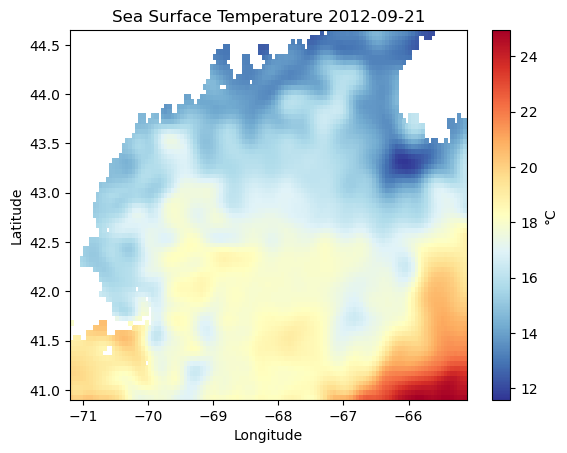

In [6]:
# Quick visualisation of one image for the whole area:

day = 8300; # the day u will plot

pcolor(lon, lat, sst_full[:,:,day]',cmap="RdYlBu_r"); colorbar(label="°C");
title("Sea Surface Temperature $(Date(time[day]))");
xlabel("Longitude");
ylabel("Latitude");

In [199]:
#let's see the lon and Lat values
@show lon
@show lat

lon = Float32[2.625, 2.6750002, 2.7250001, 2.775, 2.825, 2.875, 2.9250002, 2.9750001, 3.025, 3.075, 3.125, 3.1750002, 3.2250001, 3.275, 3.325, 3.375, 3.4250002, 3.4750001, 3.525, 3.575, 3.6250002, 3.6750002, 3.7250001, 3.775, 3.825, 3.8750002, 3.9250002, 3.9750001, 4.025, 4.0750003, 4.125, 4.175, 4.2250004, 4.275, 4.3250003, 4.375, 4.425, 4.4750004, 4.525, 4.5750003, 4.625, 4.675, 4.7250004, 4.775, 4.8250003, 4.875, 4.925, 4.9750004, 5.025, 5.0750003, 5.125, 5.175, 5.2250004, 5.275, 5.3250003, 5.375, 5.425, 5.4750004, 5.525, 5.5750003, 5.625, 5.675, 5.7250004, 5.775, 5.8250003, 5.875, 5.925, 5.9750004, 6.025, 6.0750003, 6.125, 6.175, 6.2250004, 6.275]
lat = Float32[41.825, 41.875, 41.925, 41.975, 42.024998, 42.075, 42.125, 42.175, 42.225, 42.274998, 42.325, 42.375, 42.425, 42.475, 42.524998, 42.575, 42.625, 42.675, 42.725, 42.774998, 42.825, 42.875, 42.925, 42.975, 43.024998, 43.075, 43.125, 43.175, 43.225, 43.274998, 43.325, 43.375, 43.425, 43.475, 43.524998, 43.575, 43.625, 43.675, 4

43-element Vector{Float32}:
 41.825
 41.875
 41.925
 41.975
 42.024998
 42.075
 42.125
 42.175
 42.225
 42.274998
 42.325
 42.375
 42.425
  ⋮
 43.375
 43.425
 43.475
 43.524998
 43.575
 43.625
 43.675
 43.725
 43.774998
 43.825
 43.875
 43.925

In [11]:
#time series of SST at prefered point:

# Method 1 using the lon, lat values 
# put ur lon and lat
x = convert(Float32,-71.175); #longitude value
y = convert(Float32,40.925); #latitude value

# extract the data
xx = findfirst(==(x), lon)
yy = findfirst(==(y), lat)

sst_in = sst_full[xx,yy,:];

# Method 2 using the lon, lat locations in the vector (x,y) 
#sst_out = sst_full[1,1,:];

In [13]:
#time series of SST at prefered point:

# Method 1 using the lon, lat values 
# put ur lon and lat
x2 = convert(Float32,-65.425); #longitude value
y2 = convert(Float32,44.325); #latitude value

# extract the data
xx2 = findfirst(==(x2), lon)
yy2 = findfirst(==(y2), lat)

sst_out = sst_full[xx2,yy2,:];

# Method 2 using the lon, lat locations in the vector (x,y) 
#sst_out = sst_full[1,1,:];

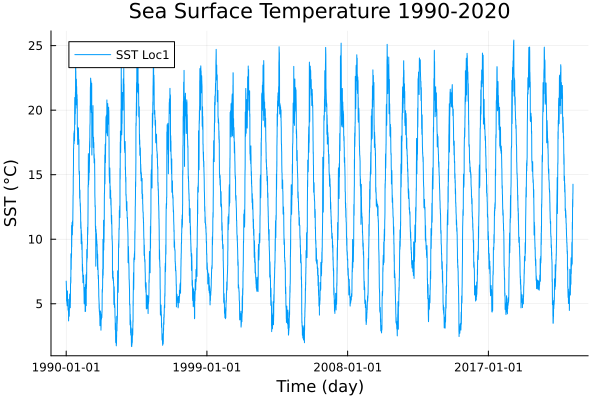

In [15]:
# TS plot for the SST at this location:
## for 1 location:

Plots.plot(time, sst_in, lab="SST Loc1")
title!("Sea Surface Temperature 1990-2020", fontsize=20)
xlabel!("Time (day)"); ylabel!("SST (°C)")

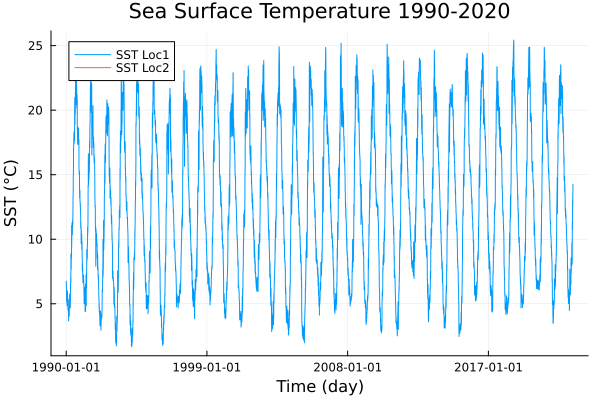

In [17]:
## For several locations at the same plot (To make a comparison)

Plots.plot(time, sst_in, lab="SST Loc1")
Plots.plot!(time, sst_out, lab="SST Loc2")
title!("Sea Surface Temperature 1990-2020", fontsize=20)
xlabel!("Time (day)"); ylabel!("SST (°C)")

In [67]:
# MHWs calculations:
## MHW dates:
sst_dates = Date(first(time)) : Date(last(time))
clim_dates = Date(first(time)) : Date(last(time))
mhw_dates = Date("2000-01-01") : Date("2020-12-31")

Date("1990-01-01"):Day(1):Date("2020-12-31")

In [69]:
# for a specific location (1d data (time series))
mhws_Loc = MarineHW(sst_in, sst_dates, mhw_dates, clim_dates; threshold=0.9); #(you can change the threshold, the default is 0.9 but it can be 0.95 or 0.99 => different threshold will give different MHWs results)

myclim = evclim(mhws_Loc);
mythresh = evthresh(mhws_Loc);
mhw_means = mhws_Loc[1].means;
mhw_annual = mhws_Loc[1].annuals;
mhw_trends = mhws_Loc[1].trends;
mhw_pval = mhws_Loc[1].pvalues;
@show size(myclim)
@show size(mythresh)

size(myclim) = (366,)
size(mythresh) = (366,)


(366,)

In [71]:
## MHW Characteristics at Location 1:
# 1. Mean metrics
MHW_MIntmean = nomissing(mhw_means.meanint, NaN);
MHW_MIntmax = nomissing(mhw_means.maxint, NaN);
MHW_MIntcum = nomissing(mhw_means.cumint, NaN);
MHW_MFreq = nomissing(mhw_means.frequency, NaN);
MHW_MDur = nomissing(mhw_means.duration, NaN);
MHW_Mdays = nomissing(mhw_means.days, NaN);
MHW_Mronset = nomissing(mhw_means.ronset, NaN);
MHW_Mrdecline = nomissing(mhw_means.rdecline, NaN);

@show MHW_MIntmean
@show MHW_MIntmax
@show MHW_MIntcum
@show MHW_MFreq
@show MHW_MDur
@show MHW_Mdays
@show MHW_Mronset
@show MHW_Mrdecline

MHW_MIntmean = [2.448381505609319]
MHW_MIntmax = [5.282911445519547]
MHW_MIntcum = [32.73576753796163]
MHW_MFreq = [1.7419354838709677]
MHW_MDur = [13.37037037037037]
MHW_Mdays = [23.29032258064516]
MHW_Mronset = [0.21731230766324028]
MHW_Mrdecline = [0.3646444863851195]


1-element Vector{Float64}:
 0.3646444863851195

In [25]:
# 2. Annual metrics
MHW_AIntmean = nomissing(mhw_annual.meanint, NaN);
MHW_AIntmax = nomissing(mhw_annual.maxint, NaN);
MHW_AIntcum = nomissing(mhw_annual.cumint, NaN);
MHW_AFreq = nomissing(mhw_annual.frequency, NaN);
MHW_ADur = nomissing(mhw_annual.duration, NaN);
MHW_Adays = nomissing(mhw_annual.days, NaN);
MHW_Aronset = nomissing(mhw_annual.ronset, NaN);
MHW_Ardecline = nomissing(mhw_annual.rdecline, NaN);

In [113]:
# plot annual metrics
y = 1990:2020;
p1 = Plots.bar(y, MHW_AFreq, xlabel = "Time (year)", ylabel = "Freq.", xticks = 1990:6:2020)
p2 = Plots.bar(y, MHW_ADur, xlabel = "Time (year)", ylabel = "Dur.", xticks = 1990:6:2020)
p3 = Plots.bar(y, MHW_AIntmean, xlabel = "Time (year)", ylabel = "MeanInt", xticks = 1990:6:2020)
p4 = Plots.bar(y, MHW_AIntmax, xlabel = "Time (year)", ylabel = "MaxInt", xticks = 1990:6:2020)
p5 = Plots.bar(y, MHW_AIntcum, xlabel = "Time (year)", ylabel = "CumInt", xticks = 1990:6:2020)
p6 = Plots.bar(y, MHW_Adays, xlabel = "Time (year)", ylabel = "Total days", xticks = 1990:6:2020)
p7 = Plots.bar(y, MHW_Aronset, xlabel = "Time (year)", ylabel = "ROnset", xticks = 1990:6:2020)
p8 = Plots.bar(y, MHW_Ardecline, xlabel = "Time (year)", ylabel = "RDecline", xticks = 1990:6:2020)
Plots.plot(p1, p2, p3, p4, p5, p6, p7, p8, layout=(3,3), widths=(4/8,4/8), size=(800,800), legend=false) 

LoadError: bar recipe: x must be same length as y (centers), or one more than y (edges).
		length(x)=31, length(y)=21

In [75]:
# 3. Metrics trends
MHW_TIntmean = nomissing(mhw_trends.meanint, NaN);
MHW_TIntmax = nomissing(mhw_trends.maxint, NaN);
MHW_TIntcum = nomissing(mhw_trends.cumint, NaN);
MHW_TFreq = nomissing(mhw_trends.frequency, NaN);
MHW_TDur = nomissing(mhw_trends.duration, NaN);
MHW_Tdays = nomissing(mhw_trends.days, NaN);
MHW_Tronset = nomissing(mhw_trends.ronset, NaN);
MHW_Trdecline = nomissing(mhw_trends.rdecline, NaN);

@show MHW_TIntmean
@show MHW_TIntmax
@show MHW_TIntcum
@show MHW_TFreq
@show MHW_TDur
@show MHW_Tdays
@show MHW_Tronset
@show MHW_Trdecline

MHW_TIntmean = [0.057209092934635886]
MHW_TIntmax = [0.08580887919219925]
MHW_TIntcum = [1.7094174481277131]
MHW_TFreq = [0.10080645161290325]
MHW_TDur = [0.710766129032259]
MHW_Tdays = [1.7745967741935502]
MHW_Tronset = [-0.0046631899853748346]
MHW_Trdecline = [0.005472289183081589]


1-element Vector{Float64}:
 0.005472289183081589

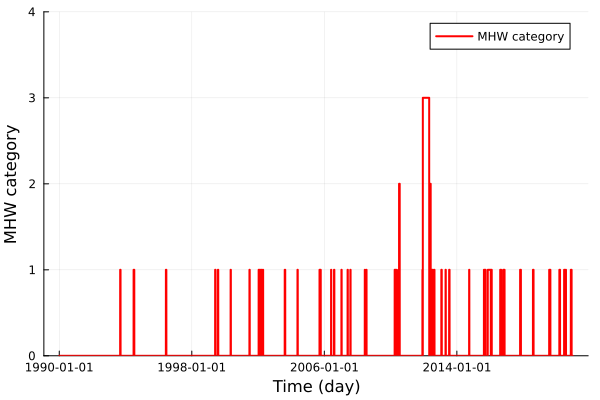

In [77]:
## plot MHW categories:
catego = mhws_Loc[1].category;
Plots.plot(mhw_dates, catego, lab="MHW category", ylims = (0, 4), lc=:red, lw=2)
xlabel!("Time (day)"); ylabel!("MHW category")

In [33]:
# MHW table for the events 
mytable = evtable(mhws_Loc)

Row,MeanInt,CumInt,MaxInt,Duration,Category,ROnset,RDecline,VarInt,StartDate,EndDate
,Float64,Float64,Float64,Int64,Float64,Float64,Float64,Float64,Date,Date
1,1.8027,12.6189,2.27011,7,1.0,0.266814,0.442558,0.581945,2000-05-05,2000-05-11
2,3.12569,21.8798,3.73444,7,1.0,0.406092,0.520113,0.452488,2001-06-25,2001-07-01
3,2.16356,10.8178,2.27325,5,1.0,0.196768,0.0927376,0.0878893,2002-01-14,2002-01-18
4,2.14101,10.705,2.24925,5,1.0,0.163661,0.168493,0.141417,2002-02-01,2002-02-05
5,1.99636,9.98182,2.18519,5,1.0,0.116813,0.236036,0.216467,2002-02-28,2002-03-04
6,2.04929,14.345,2.38192,7,1.0,0.146837,0.271593,0.273633,2002-03-13,2002-03-19
7,2.44586,22.0127,2.86026,9,1.0,0.507832,0.148441,0.351041,2002-04-15,2002-04-23
8,2.70639,32.4767,3.21576,12,1.0,0.306694,0.140805,0.433623,2003-08-12,2003-08-23
9,2.18277,15.2794,2.54367,7,1.0,0.152723,0.428771,0.27775,2004-05-19,2004-05-25


In [107]:
# Select dates to plot MHW events
d1 = Date("2011-11-01") #start date
d2 = Date("2012-09-30") #end date

date_I1 = findfirst(==(d1), time)
date_I2 = findfirst(==(d2), time)


# Calculating the clim, threshold and categories:
x = leapyearday.(sst_dates)
climly = myclim[x]
threshly = mythresh[x]
X2 = (threshly-climly) + threshly; 
X3 = (threshly-climly) + X2; 
X4 = (threshly-climly) + X3; 

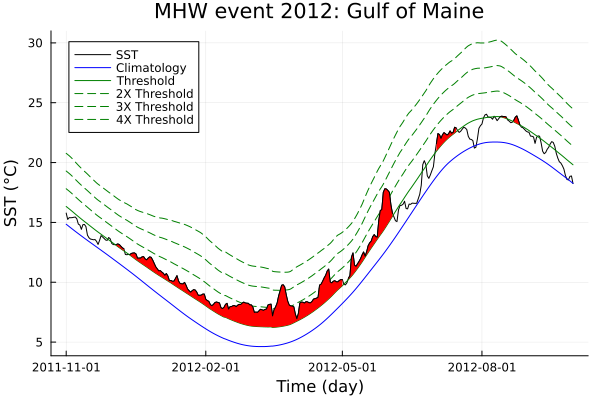

In [109]:
# plot your event

Plots.plot(time[date_I1:date_I2], sst_in[date_I1:date_I2], lab="SST", linecolor = :black)
Plots.plot!(time[date_I1:date_I2], climly[date_I1:date_I2], lab="Climatology", linecolor = :blue)
Plots.plot!(time[date_I1:date_I2], threshly[date_I1:date_I2], lab="Threshold", linecolor = :green)
Plots.plot!(time[date_I1:date_I2], X2[date_I1:date_I2], lab="2X Threshold", linecolor = :green, ls=:dash)
Plots.plot!(time[date_I1:date_I2], X3[date_I1:date_I2], lab="3X Threshold", linecolor = :green, ls=:dash)
Plots.plot!(time[date_I1:date_I2], X4[date_I1:date_I2], lab="4X Threshold", linecolor = :green, ls=:dash)

evys = findall(d1 .<= mytable.StartDate .<= d2)
evysts = mytable.StartDate[evys]
evysen = mytable.EndDate[evys]
devsts = [i for (i, a) in enumerate(time) if a in evysts]
devsen = [i for (i, a) in enumerate(time) if a in evysen]

for (ix, iy) in zip(devsts, devsen)
    Plots.plot!(time[ix:iy], sst_in[ix:iy], fillrange=threshly[ix:iy], fc = :red, linecolor = :black, label=false)
end

title!("MHW event 2012: Gulf of Maine", fontsize=20)
xlabel!("Time (day)"); ylabel!("SST (°C)")
